# Optimized Ensemble Framework with Unsupervised Learning for Ensuring Security in IoT Networks

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 
import os
import joblib
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier

## Data Analysis

In [2]:
data = pd.read_csv(r'C:\Users\USER\Desktop\saint martins\Cyber\RT_IOT2022.csv')

In [3]:
data

Unnamed: 0  id.orig_p  id.resp_p proto service  flow_duration  \
0                0      38667       1883   tcp    mqtt      32.011598   
1                1      51143       1883   tcp    mqtt      31.883584   
2                2      44761       1883   tcp    mqtt      32.124053   
3                3      60893       1883   tcp    mqtt      31.961063   
4                4      51087       1883   tcp    mqtt      31.902362   
...            ...        ...        ...   ...     ...            ...   
123112        2005      59247      63331   tcp       -       0.000006   
123113        2006      59247      64623   tcp       -       0.000007   
123114        2007      59247      64680   tcp       -       0.000006   
123115        2008      59247      65000   tcp       -       0.000006   
123116        2009      59247      65129   tcp       -       0.000006   

        fwd_pkts_tot  bwd_pkts_tot  fwd_data_pkts_tot  bwd_data_pkts_tot  ...  \
0                  9             5                  3                  3  ...   
1                  9             5                  3                  3  ...   
2                  9             5                  3                  3  ...   
3                  9             5                  3                  3  ...   
4                  9             5                  3                  3  ...   
...              ...           ...                ...                ...  ...   
123112             1             1                  0                  0  ...   
123113             1             1                  0                  0  ...   
123114             1             1                  0                  0  ...   
123115             1             1                  0                  0  ...   
123116             1             1                  0                  0  ...   

        active.std      idle.min      idle.max      idle.tot      idle.avg  \
0              0.0  2.972918e+07  2.972918e+07  2.972918e+07  2.972918e+07   
1              0.0  2.985528e+07  2.985528e+07  2.985528e+07  2.985528e+07   
2              0.0  2.984215e+07  2.984215e+07  2.984215e+07  2.984215e+07   
3              0.0  2.991377e+07  2.991377e+07  2.991377e+07  2.991377e+07   
4              0.0  2.981470e+07  2.981470e+07  2.981470e+07  2.981470e+07   
...            ...           ...           ...           ...           ...   
123112         0.0  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
123113         0.0  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
123114         0.0  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
123115         0.0  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
123116         0.0  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   

        idle.std  fwd_init_window_size  bwd_init_window_size  \
0            0.0                 64240                 26847   
1            0.0                 64240                 26847   
2            0.0                 64240                 26847   
3            0.0                 64240                 26847   
4            0.0                 64240                 26847   
...          ...                   ...                   ...   
123112       0.0                  1024                     0   
123113       0.0                  1024                     0   
123114       0.0                  1024                     0   
123115       0.0                  1024                     0   
123116       0.0                  1024                     0   

        fwd_last_window_size          Attack_type  
0                        502         MQTT_Publish  
1                        502         MQTT_Publish  
2                        502         MQTT_Publish  
3                        502         MQTT_Publish  
4                        502         MQTT_Publish  
...                      ...                  ...  
123112                  1024  NMAP_XMAS_TREE_SCAN  
123113                  1024  NMAP_X

In [4]:
data.head()

Unnamed: 0  id.orig_p  id.resp_p proto service  flow_duration  \
0           0      38667       1883   tcp    mqtt      32.011598   
1           1      51143       1883   tcp    mqtt      31.883584   
2           2      44761       1883   tcp    mqtt      32.124053   
3           3      60893       1883   tcp    mqtt      31.961063   
4           4      51087       1883   tcp    mqtt      31.902362   

   fwd_pkts_tot  bwd_pkts_tot  fwd_data_pkts_tot  bwd_data_pkts_tot  ...  \
0             9             5                  3                  3  ...   
1             9             5                  3                  3  ...   
2             9             5                  3                  3  ...   
3             9             5                  3                  3  ...   
4             9             5                  3                  3  ...   

   active.std      idle.min      idle.max      idle.tot      idle.avg  \
0         0.0  2.972918e+07  2.972918e+07  2.972918e+07  2.972918e+07   
1         0.0  2.985528e+07  2.985528e+07  2.985528e+07  2.985528e+07   
2         0.0  2.984215e+07  2.984215e+07  2.984215e+07  2.984215e+07   
3         0.0  2.991377e+07  2.991377e+07  2.991377e+07  2.991377e+07   
4         0.0  2.981470e+07  2.981470e+07  2.981470e+07  2.981470e+07   

   idle.std  fwd_init_window_size  bwd_init_window_size  fwd_last_window_size  \
0       0.0                 64240                 26847                   502   
1       0.0                 64240                 26847                   502   
2       0.0                 64240                 26847                   502   
3       0.0                 64240                 26847                   502   
4       0.0                 64240                 26847                   502   

    Attack_type  
0  MQTT_Publish  
1  MQTT_Publish  
2  MQTT_Publish  
3  MQTT_Publish  
4  MQTT_Publish  

[5 rows x 85 columns]

In [5]:
data.describe()

Unnamed: 0      id.orig_p      id.resp_p  flow_duration  \
count  123117.000000  123117.000000  123117.000000  123117.000000   
mean    37035.089248   34639.258738    1014.305092       3.809566   
std     30459.106367   19070.620354    5256.371994     130.005408   
min         0.000000       0.000000       0.000000       0.000000   
25%      6059.000000   17702.000000      21.000000       0.000001   
50%     33100.000000   37221.000000      21.000000       0.000004   
75%     63879.000000   50971.000000      21.000000       0.000005   
max     94658.000000   65535.000000   65389.000000   21728.335578   

        fwd_pkts_tot   bwd_pkts_tot  fwd_data_pkts_tot  bwd_data_pkts_tot  \
count  123117.000000  123117.000000      123117.000000      123117.000000   
mean        2.268826       1.909509           1.471218           0.820260   
std        22.336565      33.018311          19.635196          32.293948   
min         0.000000       0.000000           0.000000           0.000000   
25%         1.000000       1.000000           1.000000           0.000000   
50%         1.000000       1.000000           1.000000           0.000000   
75%         1.000000       1.000000           1.000000           0.000000   
max      4345.000000   10112.000000        4345.000000       10105.000000   

       fwd_pkts_per_sec  bwd_pkts_per_sec  ...    active.avg    active.std  \
count      1.231170e+05      1.231170e+05  ...  1.231170e+05  1.231170e+05   
mean       3.518063e+05      3.517620e+05  ...  1.481354e+05  2.353599e+04   
std        3.707645e+05      3.708015e+05  ...  1.613007e+06  1.477935e+06   
min        0.000000e+00      0.000000e+00  ...  0.000000e+00  0.000000e+00   
25%        7.454354e+01      7.288927e+01  ...  9.536740e-01  0.000000e+00   
50%        2.467238e+05      2.467238e+05  ...  4.053116e+00  0.000000e+00   
75%        5.242880e+05      5.242880e+05  ...  5.006790e+00  0.000000e+00   
max        1.048576e+06      1.048576e+06  ...  4.374931e+08  4.774862e+08   

           idle.min      idle.max      idle.tot      idle.avg      idle.std  \
count  1.231170e+05  1.231170e+05  1.231170e+05  1.231170e+05  1.231170e+05   
mean   1.616655e+06  1.701956e+06  3.517644e+06  1.664985e+06  4.550183e+04   
std    8.809396e+06  9.252337e+06  1.229508e+08  9.007064e+06  1.091361e+06   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
50%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
75%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
max    3.000000e+08  3.000000e+08  2.096777e+10  3.000000e+08  1.208029e+08   

       fwd_init_window_size  bwd_init_window_size  fwd_last_window_size  
count         123117.000000         123117.000000         123117.000000  
mean            6118.905123           2739.776018            751.647514  
std            18716.313861          10018.848534           6310.183843  
min                0.000000              0.000000              0.000000  
25%               64.000000              0.000000             64.000000  
50%               64.000000              0.000000             64.000000  
75%               64.000000              0.000000             64.000000  
max            65535.000000          65535.000000          65535.000000  

[8 rows x 82 columns]

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123117 entries, 0 to 123116
Data columns (total 85 columns):
Unnamed: 0                  123117 non-null int64
id.orig_p                   123117 non-null int64
id.resp_p                   123117 non-null int64
proto                       123117 non-null object
service                     123117 non-null object
flow_duration               123117 non-null float64
fwd_pkts_tot                123117 non-null int64
bwd_pkts_tot                123117 non-null int64
fwd_data_pkts_tot           123117 non-null int64
bwd_data_pkts_tot           123117 non-null int64
fwd_pkts_per_sec            123117 non-null float64
bwd_pkts_per_sec            123117 non-null float64
flow_pkts_per_sec           123117 non-null float64
down_up_ratio               123117 non-null float64
fwd_header_size_tot         123117 non-null int64
fwd_header_size_min         123117 non-null int64
fwd_header_size_max         123117 non-null int64
bwd_header_size_tot        

In [7]:
data.tail()

Unnamed: 0  id.orig_p  id.resp_p proto service  flow_duration  \
123112        2005      59247      63331   tcp       -       0.000006   
123113        2006      59247      64623   tcp       -       0.000007   
123114        2007      59247      64680   tcp       -       0.000006   
123115        2008      59247      65000   tcp       -       0.000006   
123116        2009      59247      65129   tcp       -       0.000006   

        fwd_pkts_tot  bwd_pkts_tot  fwd_data_pkts_tot  bwd_data_pkts_tot  ...  \
123112             1             1                  0                  0  ...   
123113             1             1                  0                  0  ...   
123114             1             1                  0                  0  ...   
123115             1             1                  0                  0  ...   
123116             1             1                  0                  0  ...   

        active.std  idle.min  idle.max  idle.tot  idle.avg  idle.std  \
123112         0.0       0.0       0.0       0.0       0.0       0.0   
123113         0.0       0.0       0.0       0.0       0.0       0.0   
123114         0.0       0.0       0.0       0.0       0.0       0.0   
123115         0.0       0.0       0.0       0.0       0.0       0.0   
123116         0.0       0.0       0.0       0.0       0.0       0.0   

        fwd_init_window_size  bwd_init_window_size  fwd_last_window_size  \
123112                  1024                     0                  1024   
123113                  1024                     0                  1024   
123114                  1024                     0                  1024   
123115                  1024                     0                  1024   
123116                  1024                     0                  1024   

                Attack_type  
123112  NMAP_XMAS_TREE_SCAN  
123113  NMAP_XMAS_TREE_SCAN  
123114  NMAP_XMAS_TREE_SCAN  
123115  NMAP_XMAS_TREE_SCAN  
123116  NMAP_XMAS_TREE_SCAN  

[5 rows x 85 columns]

In [8]:
data.corr()

Unnamed: 0  id.orig_p  id.resp_p  flow_duration  \
Unnamed: 0              1.000000   0.016951  -0.219485      -0.033754   
id.orig_p               0.016951   1.000000   0.168818       0.019978   
id.resp_p              -0.219485   0.168818   1.000000       0.012719   
flow_duration          -0.033754   0.019978   0.012719       1.000000   
fwd_pkts_tot           -0.064143   0.040027   0.005481       0.741707   
...                          ...        ...        ...            ...   
idle.avg               -0.210371   0.121083   0.022665       0.123398   
idle.std               -0.048127   0.028181   0.000354       0.112170   
fwd_init_window_size   -0.364625   0.206620   0.036895       0.057173   
bwd_init_window_size   -0.307239   0.178322  -0.011118       0.060731   
fwd_last_window_size   -0.129325   0.075855   0.128522       0.003591   

                      fwd_pkts_tot  bwd_pkts_tot  fwd_data_pkts_tot  \
Unnamed: 0               -0.064143     -0.035444          -0.027248   
id.orig_p                 0.040027      0.021090           0.017724   
id.resp_p                 0.005481     -0.004072           0.001625   
flow_duration             0.741707      0.071395           0.754355   
fwd_pkts_tot              1.000000      0.407452           0.914683   
...                            ...           ...                ...   
idle.avg                  0.106671      0.059080           0.040036   
idle.std                  0.115612      0.107515           0.051228   
fwd_init_window_size      0.132710      0.079270           0.035651   
bwd_init_window_size      0.147478      0.104156           0.046718   
fwd_last_window_size      0.008330      0.012885          -0.003717   

                      bwd_data_pkts_tot  fwd_pkts_per_sec  bwd_pkts_per_sec  \
Unnamed: 0                    -0.028472          0.304019          0.304133   
id.orig_p                      0.017749         -0.095665         -0.095754   
id.resp_p                     -0.001290         -0.135708         -0.135704   
flow_duration                  0.058859         -0.027805         -0.027799   
fwd_pkts_tot                   0.379742         -0.053855         -0.053875   
...                                 ...               ...               ...   
idle.avg                       0.046673         -0.175402         -0.175363   
idle.std                       0.094403         -0.039561         -0.039552   
fwd_init_window_size           0.053777         -0.274301         -0.274652   
bwd_init_window_size           0.072643         -0.259457         -0.259403   
fwd_last_window_size           0.011146         -0.007777         -0.007762   

                      ...  active.avg  active.std  idle.min  idle.max  \
Unnamed: 0            ...   -0.103699   -0.018338 -0.208817 -0.209388   
id.orig_p             ...    0.049005    0.003530  0.120457  0.120340   
id.resp_p             ...    0.005556   -0.000370  0.022867  0.022367   
flow_duration         ...    0.059808    0.041024  0.091827  0.136132   
fwd_pkts_tot          ...    0.218544    0.186920  0.087095  0.120481   
...                   ...         ...         ...       ...       ...   
idle.avg              ...    0.206737    0.023730  0.992706  0.995069   
idle.std              ...    0.026651    0.042978  0.136860  0.327387   
fwd_init_window_size  ...    0.246291    0.031844  0.552291  0.550056   
bwd_init_window_size  ...    0.219481    0.049145  0.488590  0.499738   
fwd_last_window_size  ...    0.014587    0.011612 -0.001563 -0.000078   

                      idle.tot  idle.avg  idle.std  fwd_init_window_size  \
Unnamed: 0           -0.032944 -0.210371 -0.048127             -0.364625   
id.orig_p             0.019328  0.121083  0.028181              0.206620   
id.resp_p             0.012528  0.022665  0.000354              0.036895   
flow_duration         0.995023  0.123398  0.112170              0.057173   
fwd_pkts_tot          0.710351  0.106671  0.115612              0.132710   
...       

## HeatMap

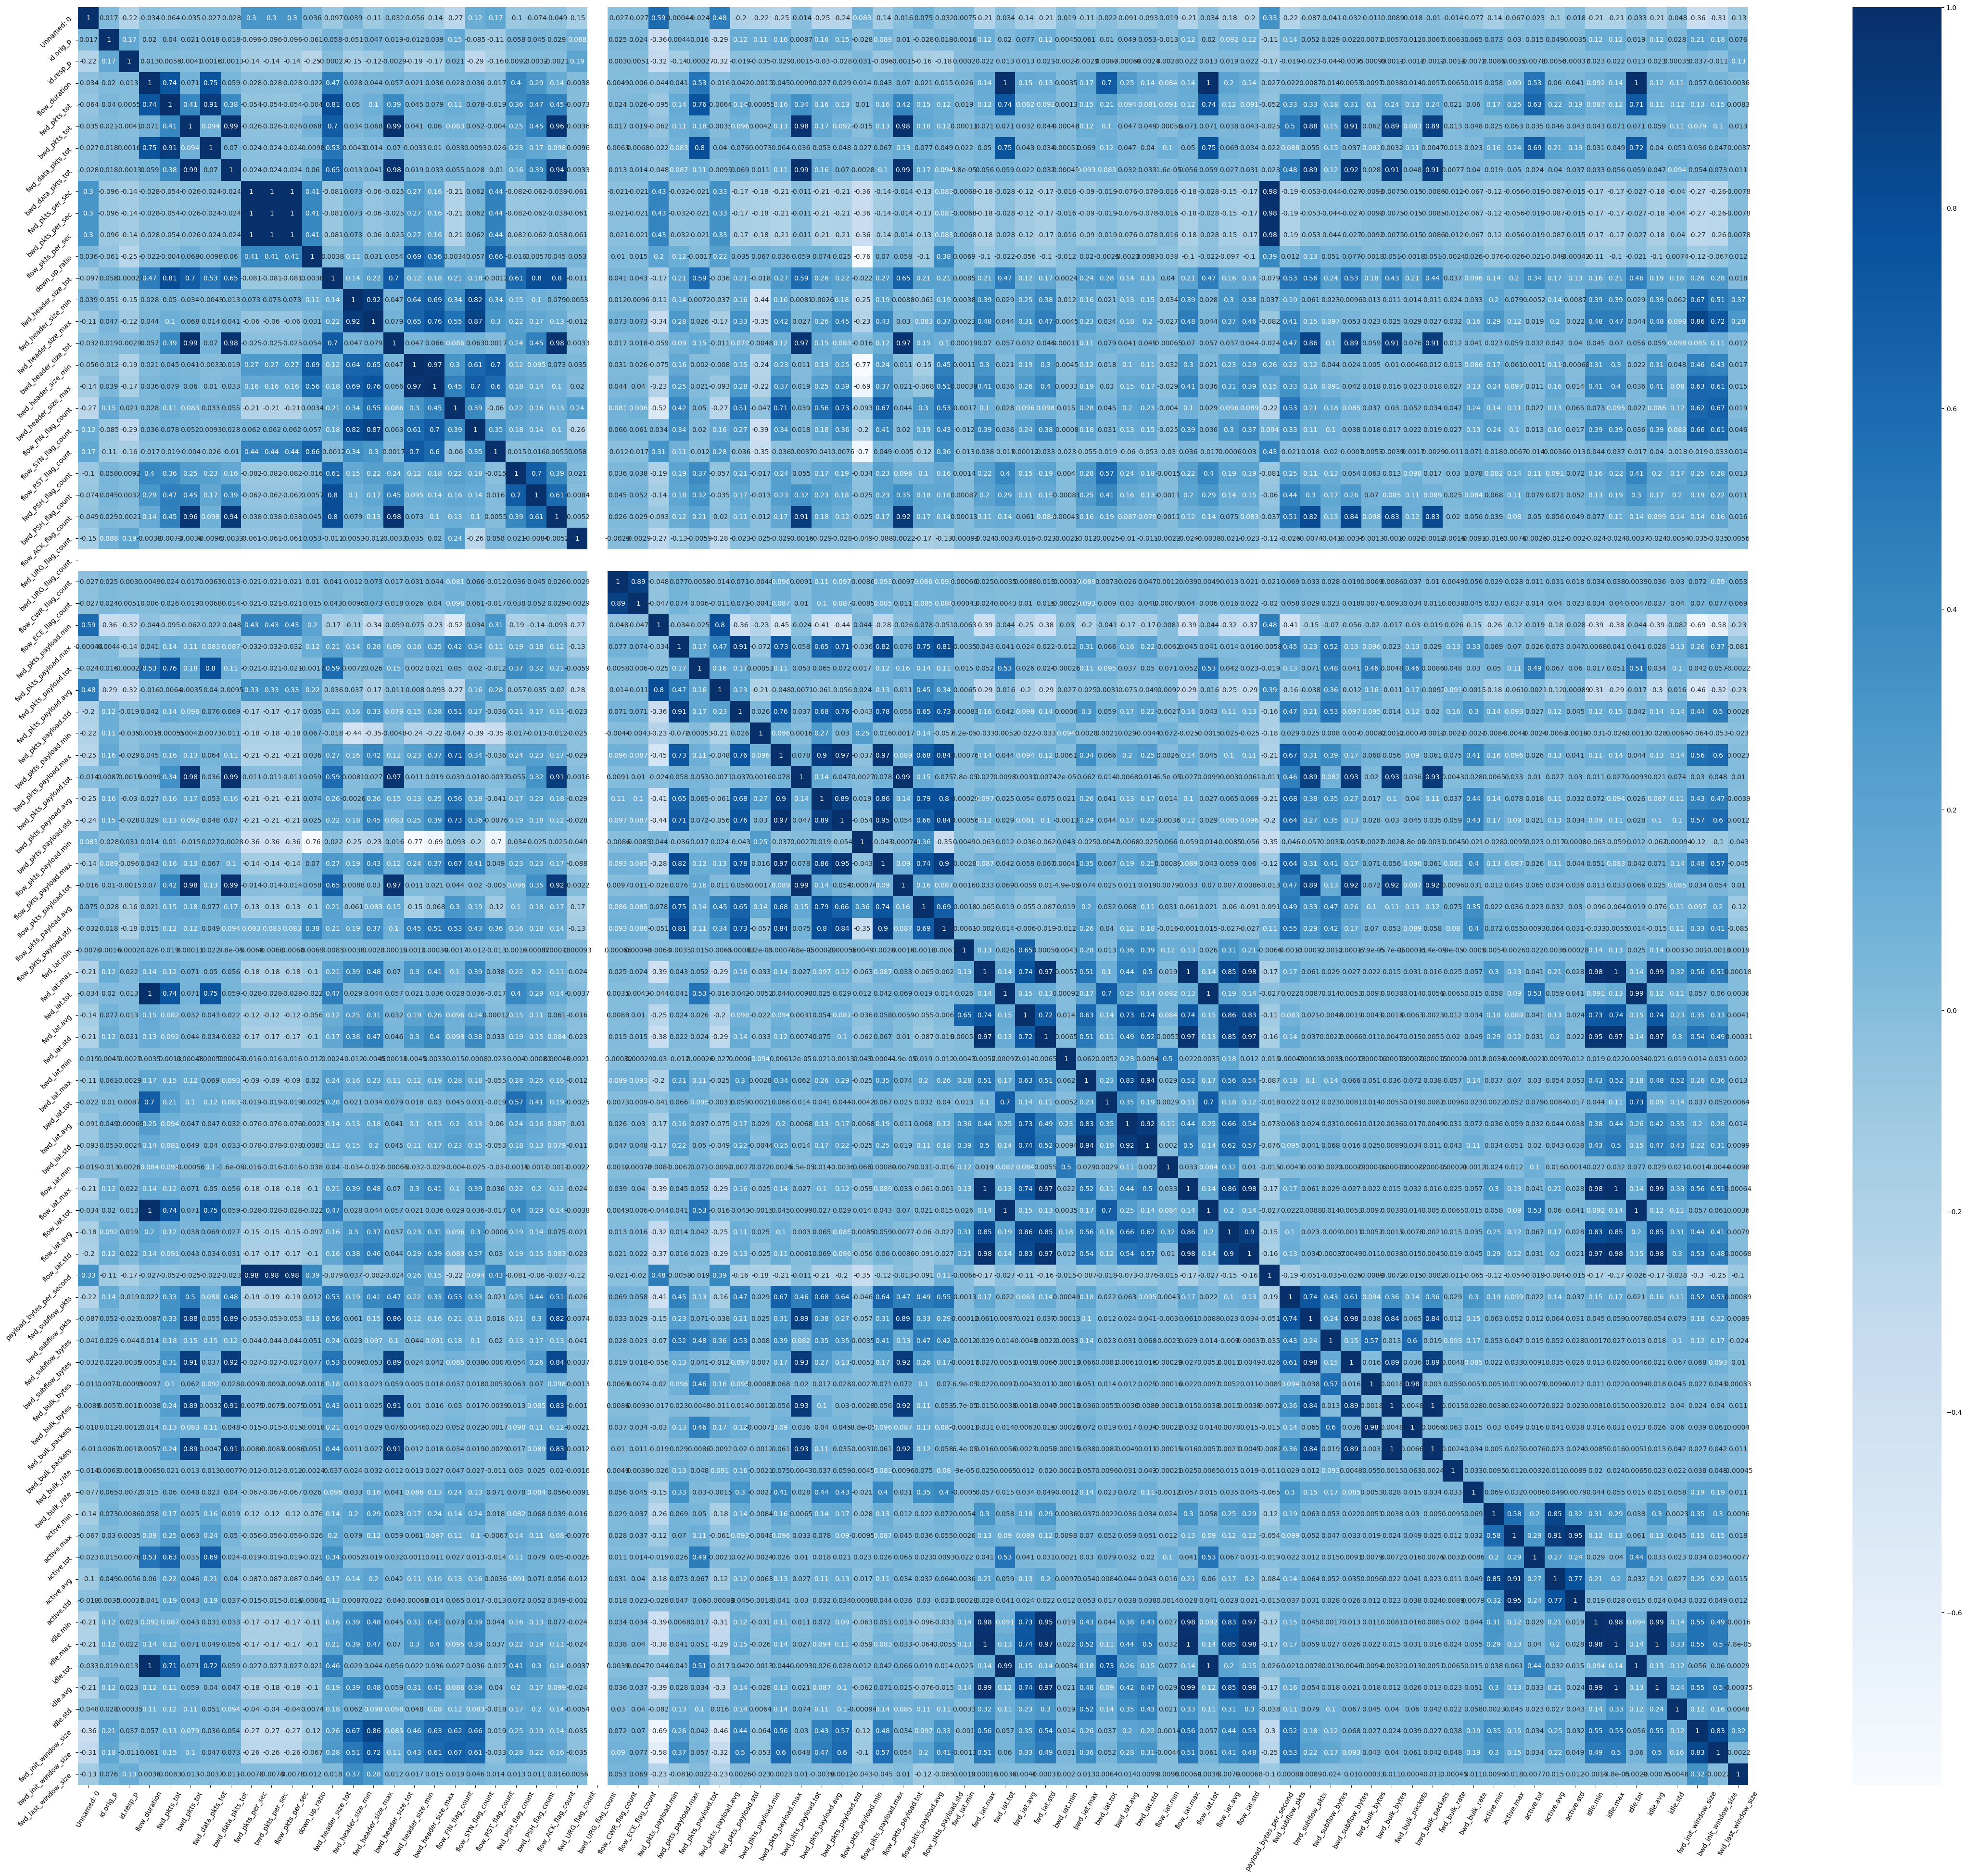

In [9]:
plt.figure(figsize = (56,48))
sns.heatmap(data.corr(), cmap = 'Blues', annot = True)
plt.xticks(rotation = 60)
plt.yticks(rotation = 45)
plt.show()

## Data Preprocessing

In [10]:
data.isnull().sum()

Unnamed: 0              0
id.orig_p               0
id.resp_p               0
proto                   0
service                 0
                       ..
idle.std                0
fwd_init_window_size    0
bwd_init_window_size    0
fwd_last_window_size    0
Attack_type             0
Length: 85, dtype: int64

## CountPlot

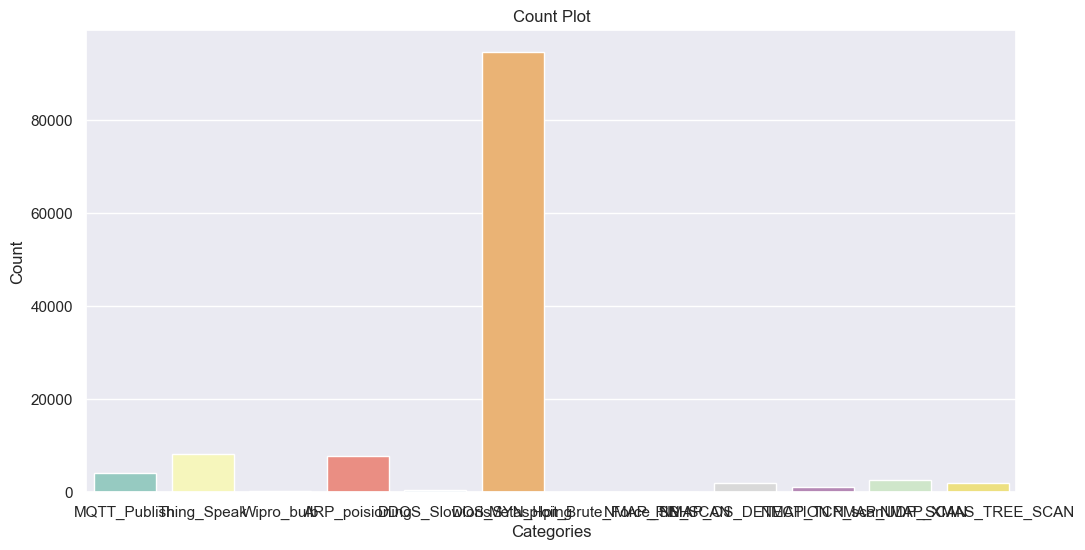

In [11]:
labels = set(data['Attack_type'])
sns.set(style = "darkgrid") 
plt.figure(figsize = (12, 6)) 
ax = sns.countplot(x = data['Attack_type'], palette = "Set3")
plt.title("Count Plot")  
plt.xlabel("Categories") 
plt.ylabel("Count") 
plt.show()

In [12]:
labels

{'ARP_poisioning',
 'DDOS_Slowloris',
 'DOS_SYN_Hping',
 'MQTT_Publish',
 'Metasploit_Brute_Force_SSH',
 'NMAP_FIN_SCAN',
 'NMAP_OS_DETECTION',
 'NMAP_TCP_scan',
 'NMAP_UDP_SCAN',
 'NMAP_XMAS_TREE_SCAN',
 'Thing_Speak',
 'Wipro_bulb'}

In [13]:
Labels = ['Attack_type','proto','service']

for i in Labels:
    data[i] = LabelEncoder().fit_transform(data[i])
data

Unnamed: 0  id.orig_p  id.resp_p  proto  service  flow_duration  \
0                0      38667       1883      1        5      32.011598   
1                1      51143       1883      1        5      31.883584   
2                2      44761       1883      1        5      32.124053   
3                3      60893       1883      1        5      31.961063   
4                4      51087       1883      1        5      31.902362   
...            ...        ...        ...    ...      ...            ...   
123112        2005      59247      63331      1        0       0.000006   
123113        2006      59247      64623      1        0       0.000007   
123114        2007      59247      64680      1        0       0.000006   
123115        2008      59247      65000      1        0       0.000006   
123116        2009      59247      65129      1        0       0.000006   

        fwd_pkts_tot  bwd_pkts_tot  fwd_data_pkts_tot  bwd_data_pkts_tot  ...  \
0                  9             5                  3                  3  ...   
1                  9             5                  3                  3  ...   
2                  9             5                  3                  3  ...   
3                  9             5                  3                  3  ...   
4                  9             5                  3                  3  ...   
...              ...           ...                ...                ...  ...   
123112             1             1                  0                  0  ...   
123113             1             1                  0                  0  ...   
123114             1             1                  0                  0  ...   
123115             1             1                  0                  0  ...   
123116             1             1                  0                  0  ...   

        active.std      idle.min      idle.max      idle.tot      idle.avg  \
0              0.0  2.972918e+07  2.972918e+07  2.972918e+07  2.972918e+07   
1              0.0  2.985528e+07  2.985528e+07  2.985528e+07  2.985528e+07   
2              0.0  2.984215e+07  2.984215e+07  2.984215e+07  2.984215e+07   
3              0.0  2.991377e+07  2.991377e+07  2.991377e+07  2.991377e+07   
4              0.0  2.981470e+07  2.981470e+07  2.981470e+07  2.981470e+07   
...            ...           ...           ...           ...           ...   
123112         0.0  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
123113         0.0  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
123114         0.0  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
123115         0.0  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
123116         0.0  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   

        idle.std  fwd_init_window_size  bwd_init_window_size  \
0            0.0                 64240                 26847   
1            0.0                 64240                 26847   
2            0.0                 64240                 26847   
3            0.0                 64240                 26847   
4            0.0                 64240                 26847   
...          ...                   ...                   ...   
123112       0.0                  1024                     0   
123113       0.0                  1024                     0   
123114       0.0                  1024                     0   
123115       0.0                  1024                     0   
123116       0.0                  1024                     0   

        fwd_last_window_size  Attack_type  
0                        502            3  
1                        502            3  
2                        502            3  
3                        502            3  
4                        502            3  
...                      ...          ...  
123112                  1024            9  
123113                  1024            9  
123114                  1024    

In [14]:
data

Unnamed: 0  id.orig_p  id.resp_p  proto  service  flow_duration  \
0                0      38667       1883      1        5      32.011598   
1                1      51143       1883      1        5      31.883584   
2                2      44761       1883      1        5      32.124053   
3                3      60893       1883      1        5      31.961063   
4                4      51087       1883      1        5      31.902362   
...            ...        ...        ...    ...      ...            ...   
123112        2005      59247      63331      1        0       0.000006   
123113        2006      59247      64623      1        0       0.000007   
123114        2007      59247      64680      1        0       0.000006   
123115        2008      59247      65000      1        0       0.000006   
123116        2009      59247      65129      1        0       0.000006   

        fwd_pkts_tot  bwd_pkts_tot  fwd_data_pkts_tot  bwd_data_pkts_tot  ...  \
0                  9             5                  3                  3  ...   
1                  9             5                  3                  3  ...   
2                  9             5                  3                  3  ...   
3                  9             5                  3                  3  ...   
4                  9             5                  3                  3  ...   
...              ...           ...                ...                ...  ...   
123112             1             1                  0                  0  ...   
123113             1             1                  0                  0  ...   
123114             1             1                  0                  0  ...   
123115             1             1                  0                  0  ...   
123116             1             1                  0                  0  ...   

        active.std      idle.min      idle.max      idle.tot      idle.avg  \
0              0.0  2.972918e+07  2.972918e+07  2.972918e+07  2.972918e+07   
1              0.0  2.985528e+07  2.985528e+07  2.985528e+07  2.985528e+07   
2              0.0  2.984215e+07  2.984215e+07  2.984215e+07  2.984215e+07   
3              0.0  2.991377e+07  2.991377e+07  2.991377e+07  2.991377e+07   
4              0.0  2.981470e+07  2.981470e+07  2.981470e+07  2.981470e+07   
...            ...           ...           ...           ...           ...   
123112         0.0  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
123113         0.0  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
123114         0.0  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
123115         0.0  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
123116         0.0  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   

        idle.std  fwd_init_window_size  bwd_init_window_size  \
0            0.0                 64240                 26847   
1            0.0                 64240                 26847   
2            0.0                 64240                 26847   
3            0.0                 64240                 26847   
4            0.0                 64240                 26847   
...          ...                   ...                   ...   
123112       0.0                  1024                     0   
123113       0.0                  1024                     0   
123114       0.0                  1024                     0   
123115       0.0                  1024                     0   
123116       0.0                  1024                     0   

        fwd_last_window_size  Attack_type  
0                        502            3  
1                        502            3  
2                        502            3  
3                        502            3  
4                        502            3  
...                      ...          ...  
123112                  1024            9  
123113                  1024            9  
123114                  1024    

In [15]:
x = data.drop(['Attack_type'], axis = 1)
x

Unnamed: 0  id.orig_p  id.resp_p  proto  service  flow_duration  \
0                0      38667       1883      1        5      32.011598   
1                1      51143       1883      1        5      31.883584   
2                2      44761       1883      1        5      32.124053   
3                3      60893       1883      1        5      31.961063   
4                4      51087       1883      1        5      31.902362   
...            ...        ...        ...    ...      ...            ...   
123112        2005      59247      63331      1        0       0.000006   
123113        2006      59247      64623      1        0       0.000007   
123114        2007      59247      64680      1        0       0.000006   
123115        2008      59247      65000      1        0       0.000006   
123116        2009      59247      65129      1        0       0.000006   

        fwd_pkts_tot  bwd_pkts_tot  fwd_data_pkts_tot  bwd_data_pkts_tot  ...  \
0                  9             5                  3                  3  ...   
1                  9             5                  3                  3  ...   
2                  9             5                  3                  3  ...   
3                  9             5                  3                  3  ...   
4                  9             5                  3                  3  ...   
...              ...           ...                ...                ...  ...   
123112             1             1                  0                  0  ...   
123113             1             1                  0                  0  ...   
123114             1             1                  0                  0  ...   
123115             1             1                  0                  0  ...   
123116             1             1                  0                  0  ...   

          active.avg  active.std      idle.min      idle.max      idle.tot  \
0       2.282415e+06         0.0  2.972918e+07  2.972918e+07  2.972918e+07   
1       2.028307e+06         0.0  2.985528e+07  2.985528e+07  2.985528e+07   
2       2.281904e+06         0.0  2.984215e+07  2.984215e+07  2.984215e+07   
3       2.047288e+06         0.0  2.991377e+07  2.991377e+07  2.991377e+07   
4       2.087657e+06         0.0  2.981470e+07  2.981470e+07  2.981470e+07   
...              ...         ...           ...           ...           ...   
123112  5.960464e+00         0.0  0.000000e+00  0.000000e+00  0.000000e+00   
123113  6.914139e+00         0.0  0.000000e+00  0.000000e+00  0.000000e+00   
123114  5.960464e+00         0.0  0.000000e+00  0.000000e+00  0.000000e+00   
123115  5.960464e+00         0.0  0.000000e+00  0.000000e+00  0.000000e+00   
123116  5.960464e+00         0.0  0.000000e+00  0.000000e+00  0.000000e+00   

            idle.avg  idle.std  fwd_init_window_size  bwd_init_window_size  \
0       2.972918e+07       0.0                 64240                 26847   
1       2.985528e+07       0.0                 64240                 26847   
2       2.984215e+07       0.0                 64240                 26847   
3       2.991377e+07       0.0                 64240                 26847   
4       2.981470e+07       0.0                 64240                 26847   
...              ...       ...                   ...                   ...   
123112  0.000000e+00       0.0                  1024                     0   
123113  0.000000e+00       0.0                  1024                     0   
123114  0.000000e+00       0.0                  1024                     0   
123115  0.000000e+00       0.0                  1024                     0   
123116  0.000000e+00       0.0                  1024                     0   

        fwd_last_window_size  
0                        502  
1                        502  
2                        502  
3                        502  
4                        502  
...                      ...  
123112                  1024  
123113      

In [16]:
y = data['Attack_type']
y

0         3
1         3
2         3
3         3
4         3
         ..
123112    9
123113    9
123114    9
123115    9
123116    9
Name: Attack_type, Length: 123117, dtype: int32

In [17]:
data = SMOTE(random_state=42)
x_resampled, y_resampled = data.fit_resample(x, y)
data

SMOTE(random_state=42)

In [18]:
# Apply PCA
pca = PCA()
x_resampled = pca.fit_transform(x_resampled)

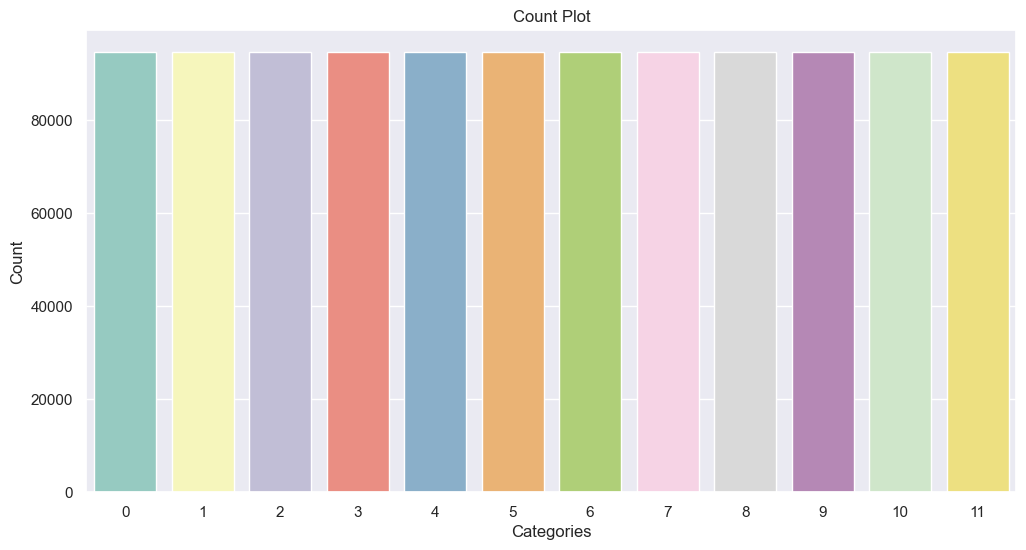

In [19]:
sns.set(style = "darkgrid") 
plt.figure(figsize = (12, 6)) 
ax = sns.countplot(x = y_resampled, palette = "Set3")
plt.title("Count Plot")  
plt.xlabel("Categories") 
plt.ylabel("Count") 
plt.show()

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x_resampled,y_resampled, test_size = 0.20, random_state = 42)

In [21]:
x_train

array([[-8.85073637e+07, -9.01380430e+05,  2.28995249e+06, ...,
         6.98363025e-09, -1.53920208e-09, -8.05056827e-11],
       [-8.85173175e+07, -8.98738996e+05,  2.29918660e+06, ...,
         2.76228701e-08,  3.74184750e-10,  1.10229644e-10],
       [-6.74746234e+07,  3.36220531e+06,  1.33338159e+06, ...,
         1.28265828e-08,  3.67268484e-10, -1.71394474e-09],
       ...,
       [-8.85039466e+07, -8.91387491e+05,  2.27787301e+06, ...,
        -8.76886028e-08, -5.22552984e-10,  3.72685483e-11],
       [-8.85173227e+07, -8.98740377e+05,  2.29922280e+06, ...,
         4.92704995e-08, -1.63848993e-10,  8.88923505e-11],
       [-8.85173158e+07, -8.98738389e+05,  2.29917708e+06, ...,
         4.26663205e-08, -2.22726847e-10, -7.06278669e-12]])

In [22]:
y_train

20680     1
703514    7
329652    3
494205    5
732319    7
         ..
110268    2
259178    1
131932    0
671155    6
121958    9
Name: Attack_type, Length: 908726, dtype: int32

In [23]:
x_test

array([[-5.39648908e+07,  6.93309881e+06,  2.28072044e+06, ...,
         1.07638948e-08, -3.32790798e-10, -1.37681863e-09],
       [-4.92796198e+07, -1.09496052e+07,  1.87128890e+06, ...,
        -3.80043179e-07,  4.49013747e-10, -1.94274273e-10],
       [-8.85173145e+07, -8.98737956e+05,  2.29916944e+06, ...,
         2.75068455e-08, -9.39769510e-11,  1.47439281e-10],
       ...,
       [-8.85173158e+07, -8.98738370e+05,  2.29917705e+06, ...,
         4.86226846e-08, -5.82702282e-10,  3.72588675e-11],
       [-8.85169530e+07, -8.98734375e+05,  2.29919363e+06, ...,
         5.80813671e-07, -5.68938764e-10,  6.80971817e-11],
       [-8.85173154e+07, -8.98738236e+05,  2.29917501e+06, ...,
        -5.29201641e-07, -1.47665268e-09,  8.28874906e-11]])

In [24]:
y_test

373593    3
214673    1
715420    7
429920    4
141764    0
         ..
954439    9
708792    7
609110    6
152306    0
628579    6
Name: Attack_type, Length: 227182, dtype: int32

In [25]:
x_train.shape

(908726, 84)

In [26]:
y_train.shape

(908726,)

## Performance Evaluation

In [27]:
precision = []
recall = []
fscore = []
accuracy = []


def performance_metrics(algorithm, predict, testY):
    testY = testY.astype('int')
    predict = predict.astype('int')
    p = precision_score(testY, predict,average='macro') * 100
    r = recall_score(testY, predict,average='macro') * 100
    f = f1_score(testY, predict,average='macro') * 100
    a = accuracy_score(testY,predict)*100 
    accuracy.append(a)
    precision.append(p)
    recall.append(r)
    fscore.append(f)
    print(algorithm+' Accuracy    : '+str(a))
    print(algorithm+' Precision   : '+str(p))
    print(algorithm+' Recall      : '+str(r))
    print(algorithm+' FSCORE      : '+str(f))
    report=classification_report(predict, testY,target_names=labels)
    print('\n',algorithm+" classification report\n",report)
    conf_matrix = confusion_matrix(testY, predict) 
    plt.figure(figsize =(5, 5)) 
    ax = sns.heatmap(conf_matrix, xticklabels = labels, yticklabels = labels, annot = True, cmap="Blues" ,fmt ="g");
    ax.set_ylim([0,len(labels)])
    plt.title(algorithm+" Confusion matrix") 
    plt.ylabel('True class') 
    plt.xlabel('Predicted class') 
    plt.show()

# RidgeClassifier Algorithm

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=6.70739e-25): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


RidgeClassifier Accuracy    : 90.82365680379607
RidgeClassifier Precision   : 90.5850756770274
RidgeClassifier Recall      : 90.8642809041396
RidgeClassifier FSCORE      : 90.13838224291318

 RidgeClassifier classification report
                             precision    recall  f1-score   support

Metasploit_Brute_Force_SSH       0.36      0.66      0.47     10312
       NMAP_XMAS_TREE_SCAN       0.98      0.89      0.93     20624
            DDOS_Slowloris       1.00      1.00      1.00     18732
             DOS_SYN_Hping       1.00      1.00      1.00     19105
         NMAP_OS_DETECTION       0.83      0.96      0.89     16519
            ARP_poisioning       0.97      0.95      0.96     19158
             NMAP_FIN_SCAN       1.00      0.99      0.99     19129
               Thing_Speak       1.00      0.97      0.98     19333
                Wipro_bulb       0.93      0.73      0.82     24304
              MQTT_Publish       1.00      1.00      1.00     19009
             NMAP_TC

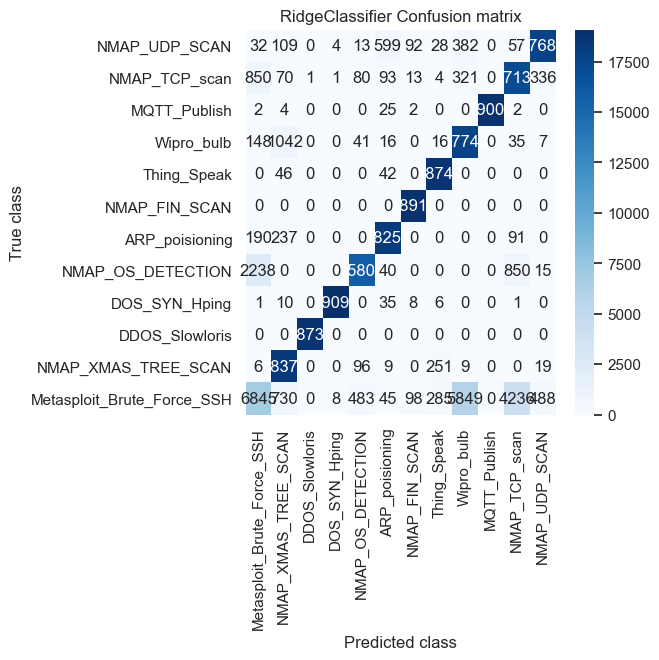

In [28]:
#ridge_model_path = 'model/RidgeClassifier.joblib'
if os.path.exists('RidgeClassifier.pkl'):
    ridge_classifier = joblib.load('RidgeClassifier.pkl')
    y_pred_ridge = ridge_classifier.predict(x_test)
    performance_metrics('Ridge_Classifier', y_pred_ridge, y_test)
    
else:                       
    ridge_classifier = RidgeClassifier()
    ridge_classifier.fit(x_train, y_train)
    joblib.dump(ridge_classifier, 'Ridge_Classifier.pkl')
    y_pred_ridge = ridge_classifier.predict(x_test)
    performance_metrics('RidgeClassifier', y_pred_ridge, y_test)

# DecisionTree Algorithm

Decision Tree Classifier Accuracy    : 99.89699888195368
Decision Tree Classifier Precision   : 99.89724083867681
Decision Tree Classifier Recall      : 99.89734719047058
Decision Tree Classifier FSCORE      : 99.89728392597303

 Decision Tree Classifier classification report
                             precision    recall  f1-score   support

Metasploit_Brute_Force_SSH       0.99      1.00      1.00     19037
       NMAP_XMAS_TREE_SCAN       1.00      1.00      1.00     18774
            DDOS_Slowloris       1.00      1.00      1.00     18732
             DOS_SYN_Hping       1.00      1.00      1.00     19155
         NMAP_OS_DETECTION       1.00      1.00      1.00     18957
            ARP_poisioning       1.00      1.00      1.00     18769
             NMAP_FIN_SCAN       1.00      1.00      1.00     18916
               Thing_Speak       1.00      1.00      1.00     18834
                Wipro_bulb       1.00      1.00      1.00     19050
              MQTT_Publish       1.00    

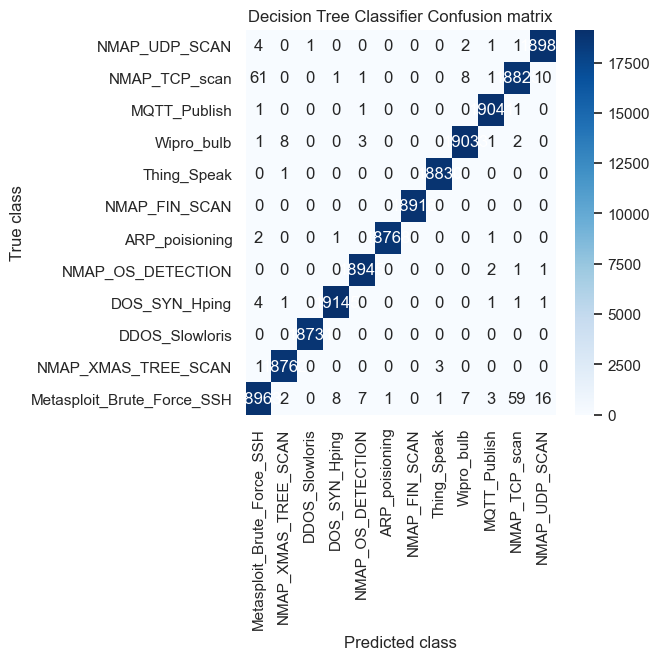

In [29]:
if os.path.exists('DecisionTree_weights.pkl'):
    # Load the model from the pkl file
    classifier = joblib.load('DecisionTree_weights.pkl')
    predict = classifier.predict(x_test)
    performance_metrics("Decision Tree Classifier", predict, y_test)
else:
    # Train the classifier on the training data
    classifier = DecisionTreeClassifier(random_state=4)  # You can adjust the parameters as needed
    classifier.fit(x_train, y_train)
    # Make predictions on the test data
    predict = classifier.predict(x_test)
    # Save the model weights to a pkl file
    joblib.dump(classifier, 'DecisionTree_weights.pkl')
    print("Decision Tree classifier model trained and model weights saved.")
    performance_metrics("Decision Tree Classifier", predict, y_test)

In [40]:
test = pd.read_csv(r"test.csv")
test

Unnamed: 0  id.orig_p  id.resp_p proto service  flow_duration  \
0          3750      32791       1883   tcp    mqtt      62.104276   
1          1967      48589       1883   tcp    mqtt      27.047985   
2          1583      50709       1883   tcp    mqtt       9.954834   
3           296      37409       1883   tcp    mqtt      32.077452   
4           149      58161       1883   tcp    mqtt      31.961414   
..          ...        ...        ...   ...     ...            ...   
175         812      36242       9593   tcp       -       0.000006   
176        1450      59247        481   tcp       -       0.000006   
177         651      36242       5907   tcp       -       0.000006   
178         561      36242      15000   tcp       -       0.000022   
179        1473      59247        711   tcp       -       0.000009   

     fwd_pkts_tot  bwd_pkts_tot  fwd_data_pkts_tot  bwd_data_pkts_tot  ...  \
0              10             6                  3                  4  ...   
1              10             6                  3                  4  ...   
2              10             6                  3                  4  ...   
3               9             5                  3                  3  ...   
4               9             5                  3                  3  ...   
..            ...           ...                ...                ...  ...   
175             1             1                  0                  0  ...   
176             1             1                  0                  0  ...   
177             1             1                  0                  0  ...   
178             1             1                  0                  0  ...   
179             1             1                  0                  0  ...   

       active.avg  active.std      idle.min      idle.max      idle.tot  \
0    2.300256e+06         0.0  5.980402e+07  5.980402e+07  5.980402e+07   
1    2.294049e+06         0.0  2.475394e+07  2.475394e+07  2.475394e+07   
2    2.095775e+06         0.0  7.859059e+06  7.859059e+06  7.859059e+06   
3    2.341664e+06         0.0  2.973579e+07  2.973579e+07  2.973579e+07   
4    2.087255e+06         0.0  2.987416e+07  2.987416e+07  2.987416e+07   
..            ...         ...           ...           ...           ...   
175  6.198883e+00         0.0  0.000000e+00  0.000000e+00  0.000000e+00   
176  5.960464e+00         0.0  0.000000e+00  0.000000e+00  0.000000e+00   
177  5.960464e+00         0.0  0.000000e+00  0.000000e+00  0.000000e+00   
178  2.193451e+01         0.0  0.000000e+00  0.000000e+00  0.000000e+00   
179  9.059906e+00         0.0  0.000000e+00  0.000000e+00  0.000000e+00   

         idle.avg  idle.std  fwd_init_window_size  bwd_init_window_size  \
0    5.980402e+07       0.0                 64240                 26847   
1    2.475394e+07       0.0                 64240                 26847   
2    7.859059e+06       0.0                 64240                 26847   
3    2.973579e+07       0.0                 64240                 26847   
4    2.987416e+07       0.0                 64240                 26847   
..            ...       ...                   ...                   ...   
175  0.000000e+00       0.0                  1024                     0   
176  0.000000e+00       0.0                  1024                     0   
177  0.000000e+00       0.0                  1024                     0   
178  0.000000e+00       0.0                  1024                     0   
179  0.000000e+00       0.0                  1024                     0   

     fwd_last_window_size  
0                     502  
1                     502  
2                     502  
3                     502  
4                     502  
..                    ...  
175                  1024  
176                  1024  
177                  1024  
178                  1024  
179                  1024  

[180 rows x 84 columns]

In [41]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 84 columns):
Unnamed: 0                  180 non-null int64
id.orig_p                   180 non-null int64
id.resp_p                   180 non-null int64
proto                       180 non-null object
service                     180 non-null object
flow_duration               180 non-null float64
fwd_pkts_tot                180 non-null int64
bwd_pkts_tot                180 non-null int64
fwd_data_pkts_tot           180 non-null int64
bwd_data_pkts_tot           180 non-null int64
fwd_pkts_per_sec            180 non-null float64
bwd_pkts_per_sec            180 non-null float64
flow_pkts_per_sec           180 non-null float64
down_up_ratio               180 non-null float64
fwd_header_size_tot         180 non-null int64
fwd_header_size_min         180 non-null int64
fwd_header_size_max         180 non-null int64
bwd_header_size_tot         180 non-null int64
bwd_header_size_min         180 non-n

In [42]:
Labels = ['proto','service']

for i in Labels:
    test[i] = LabelEncoder().fit_transform(test[i])
test

Unnamed: 0  id.orig_p  id.resp_p  proto  service  flow_duration  \
0          3750      32791       1883      0        4      62.104276   
1          1967      48589       1883      0        4      27.047985   
2          1583      50709       1883      0        4       9.954834   
3           296      37409       1883      0        4      32.077452   
4           149      58161       1883      0        4      31.961414   
..          ...        ...        ...    ...      ...            ...   
175         812      36242       9593      0        0       0.000006   
176        1450      59247        481      0        0       0.000006   
177         651      36242       5907      0        0       0.000006   
178         561      36242      15000      0        0       0.000022   
179        1473      59247        711      0        0       0.000009   

     fwd_pkts_tot  bwd_pkts_tot  fwd_data_pkts_tot  bwd_data_pkts_tot  ...  \
0              10             6                  3                  4  ...   
1              10             6                  3                  4  ...   
2              10             6                  3                  4  ...   
3               9             5                  3                  3  ...   
4               9             5                  3                  3  ...   
..            ...           ...                ...                ...  ...   
175             1             1                  0                  0  ...   
176             1             1                  0                  0  ...   
177             1             1                  0                  0  ...   
178             1             1                  0                  0  ...   
179             1             1                  0                  0  ...   

       active.avg  active.std      idle.min      idle.max      idle.tot  \
0    2.300256e+06         0.0  5.980402e+07  5.980402e+07  5.980402e+07   
1    2.294049e+06         0.0  2.475394e+07  2.475394e+07  2.475394e+07   
2    2.095775e+06         0.0  7.859059e+06  7.859059e+06  7.859059e+06   
3    2.341664e+06         0.0  2.973579e+07  2.973579e+07  2.973579e+07   
4    2.087255e+06         0.0  2.987416e+07  2.987416e+07  2.987416e+07   
..            ...         ...           ...           ...           ...   
175  6.198883e+00         0.0  0.000000e+00  0.000000e+00  0.000000e+00   
176  5.960464e+00         0.0  0.000000e+00  0.000000e+00  0.000000e+00   
177  5.960464e+00         0.0  0.000000e+00  0.000000e+00  0.000000e+00   
178  2.193451e+01         0.0  0.000000e+00  0.000000e+00  0.000000e+00   
179  9.059906e+00         0.0  0.000000e+00  0.000000e+00  0.000000e+00   

         idle.avg  idle.std  fwd_init_window_size  bwd_init_window_size  \
0    5.980402e+07       0.0                 64240                 26847   
1    2.475394e+07       0.0                 64240                 26847   
2    7.859059e+06       0.0                 64240                 26847   
3    2.973579e+07       0.0                 64240                 26847   
4    2.987416e+07       0.0                 64240                 26847   
..            ...       ...                   ...                   ...   
175  0.000000e+00       0.0                  1024                     0   
176  0.000000e+00       0.0                  1024                     0   
177  0.000000e+00       0.0                  1024                     0   
178  0.000000e+00       0.0                  1024                     0   
179  0.000000e+00       0.0                  1024                     0   

     fwd_last_window_size  
0                     502  
1                     502  
2                     502  
3                     502  
4                     502  
..                    ...  
175                  1024  
176                  1024  
177                  1024  
178                  1024  
179                  1024  

[180 rows x 84 columns]

In [43]:
predict = classifier.predict(test)
predict

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0,
       0, 0, 4, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0,
       4, 8, 8, 4, 0, 8, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 4, 0, 4, 4, 4, 4, 0,
       4, 4, 4, 4, 4, 4, 0, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4])

In [44]:
A='minimum'
B='maximum'
#test = pd.read_csv((r"test.csv")
predict = classifier.predict(test)
for i in range(len(predict)):
    if predict[i] == 0:
        print("{} :{} ".format(test.iloc[i,:],A))
    elif predict[i]== 4:
        print("{} :{} ".format(test.iloc[i, :],B))

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Unnamed: 0              3.750000e+03
id.orig_p               3.279100e+04
id.resp_p               1.883000e+03
proto                   0.000000e+00
service                 4.000000e+00
                            ...     
idle.avg                5.980402e+07
idle.std                0.000000e+00
fwd_init_window_size    6.424000e+04
bwd_init_window_size    2.684700e+04
fwd_last_window_size    5.020000e+02
Name: 0, Length: 84, dtype: float64 :maximum 
Unnamed: 0              1.967000e+03
id.orig_p               4.858900e+04
id.resp_p               1.883000e+03
proto                   0.000000e+00
service                 4.000000e+00
                            ...     
idle.avg                2.475394e+07
idle.std                0.000000e+00
fwd_init_window_size    6.424000e+04
bwd_init_window_size    2.684700e+04
fwd_last_window_size    5.020000e+02
Name: 1, Length: 84, dtype: float64 :maximum 
Unnamed: 0              1.583000e+03
id.orig_p               5.070900e+04
id.resp_p           